In [1]:
import gymnasium
import matplotlib.pyplot as plt
import numpy as np


from src.agents import DQNAgent, DoubleDQNAgent
from src.value_functions import ValueFunction
from src.utils import run_env

### DQN Agent

In [4]:
env = gymnasium.make('CartPole-v1', render_mode='rgb_array')

In [5]:
dqn_agent = DQNAgent(env, 'cartpole', ValueFunction, convergence_value=500, learning_rate=3e-4, batch_size=128,discount_factor=0.99, buffer_size=10000)

In [6]:
dqn_agent.trainer(500)

  0%|          | 0/500 [00:00<?, ?it/s]

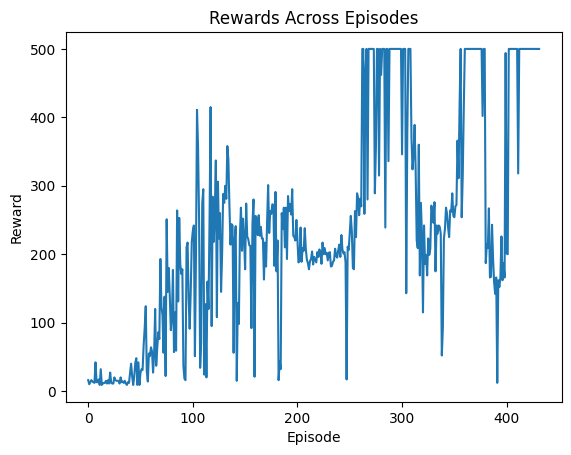

In [7]:
# Assuming dqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(dqn_agent.reward_across_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()


In [8]:
rewards = run_env(env, dqn_agent.q_value_function, episodes = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

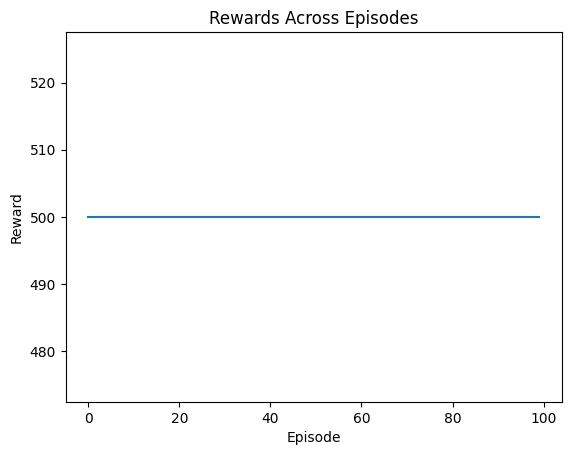

In [9]:
# Assuming ddqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()


In [10]:
print('Average Reward:',np.mean(rewards))

Average Reward: 500.0


### Dobule DQN Agent

In [18]:
env = gymnasium.make('CartPole-v1', render_mode='rgb_array')

In [19]:
ddqn_agent = DoubleDQNAgent(env, 'cartpole', ValueFunction, convergence_value=500, learning_rate=3e-4, batch_size=128,discount_factor=0.99, buffer_size=10000)

In [20]:
ddqn_agent.trainer(500)

  0%|          | 0/500 [00:00<?, ?it/s]

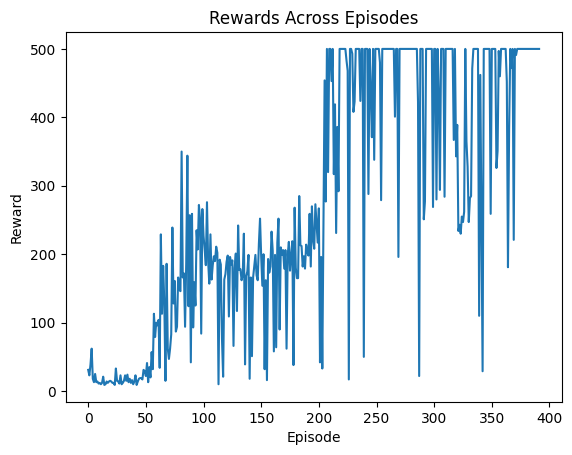

In [21]:
# Assuming ddqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(ddqn_agent.reward_across_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()

In [22]:
rewards = run_env(env, ddqn_agent.q_value_function, episodes = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

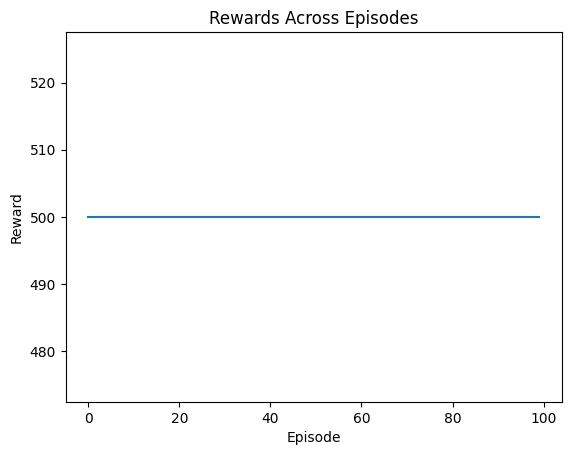

In [23]:
# Assuming ddqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()


In [24]:
print('Average Reward:',np.mean(rewards))

Average Reward: 500.0


### DQN Analysis

In [5]:
import pickle
import matplotlib.pyplot as plt

In [13]:
with open('sadapala_assignment2_part2_dqn_cartpole.pickle', 'rb') as f:
    dqn_agent = pickle.load(f)

In [7]:
epsilons = []
epsilon = 1
epsilon_decay_factor = np.power(0.01/epsilon, 1/500)
for _ in range(400):
    epsilons.append(epsilon)
    epsilon = epsilon * epsilon_decay_factor

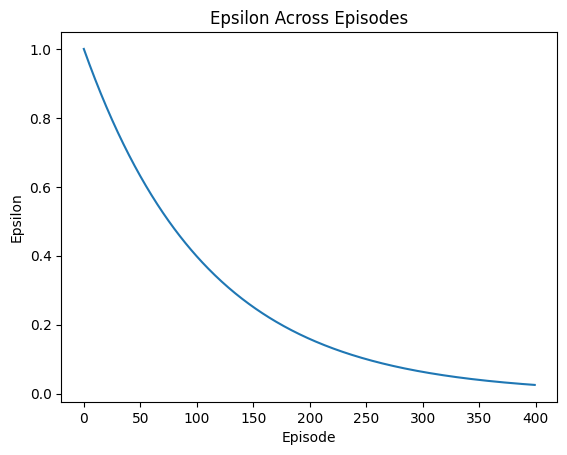

In [8]:
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Across Episodes')
plt.show()

### DDQN Analysis

In [14]:
with open('sadapala_assignment2_part3_ddqn_cartpole.pickle', 'rb') as f:
    ddqn_agent = pickle.load(f)

In [10]:
epsilons = []
epsilon = 1
epsilon_decay_factor = np.power(0.01/epsilon, 1/500)
for _ in range(400):
    epsilons.append(epsilon)
    epsilon = epsilon * epsilon_decay_factor

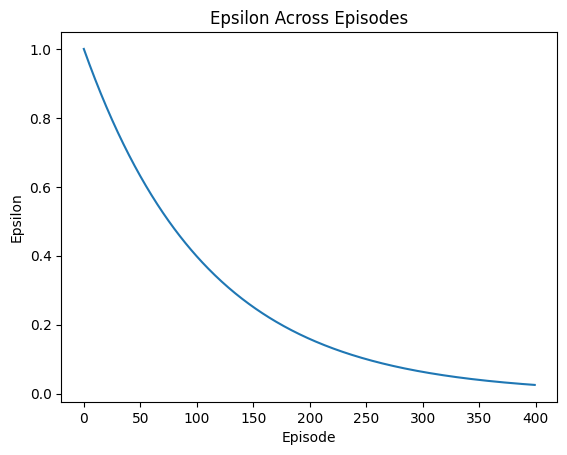

In [11]:
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Across Episodes')
plt.show()

### Both Alogrithms Analysis

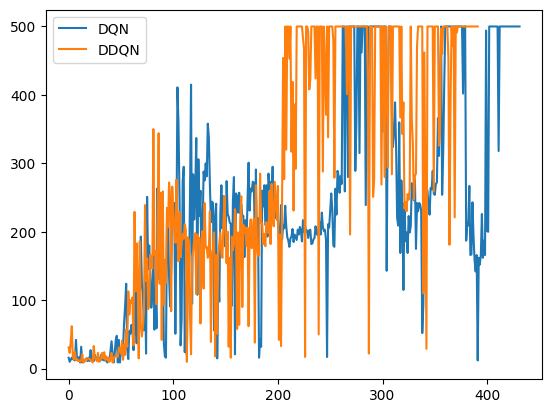

In [15]:
plt.plot(dqn_agent.reward_across_episodes)
plt.plot(ddqn_agent.reward_across_episodes)
plt.legend(['DQN', 'DDQN'])

In [17]:
dqn_rewards = run_env(env, dqn_agent.q_value_function)
ddqn_rewards = run_env(env, ddqn_agent.q_value_function)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

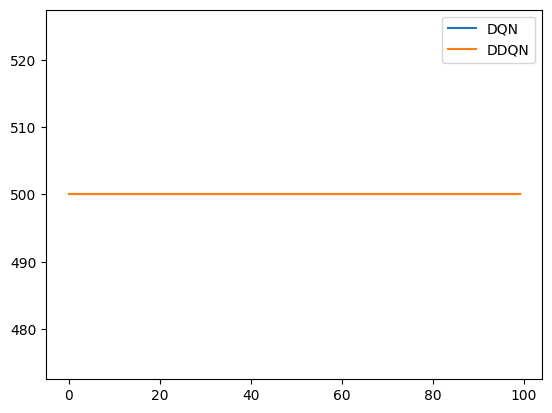

In [18]:
plt.plot(dqn_rewards)
plt.plot(ddqn_rewards)
plt.legend(['DQN', 'DDQN'])